In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("../dataset/dataset.csv")

# Display the first few rows of the dataset
df.head()


,patent_id,title,assignee,author,priority_date,creation_date,publ_date,grant_date,result_link,fig_link
0,US-11074495-B2,System and method for extremely efficient imag...,"Z Advanced Computing, Inc. (Zac)","Lotfi A. Zadeh, Saied Tadayon, Bijan Tadayon",28-02-2013,12-03-2018,27-07-2021,27-07-2021,https://patents.google.com/patent/US11074495B2/en,https://patentimages.storage.googleapis.com/32...
1,AU-2021204774-B2,Security in a smart-sensored home,Google Llc,"Anthony M. Fadell, Yoky Matsuoka, Matthew Lee ...",14-03-2013,08-07-2021,10-11-2022,10-11-2022,https://patents.google.com/patent/AU2021204774...,NaN
2,US-11526167-B1,Autonomous vehicle component maintenance and r...,State Farm Mutual Automobile Insurance Company,"Blake Konrardy, Scott T. Christensen, Gregory ...",22-01-2016,20-10-2020,13-12-2022,13-12-2022,https://patents.google.com/patent/US11526167B1/en,https://patentimages.storage.googleapis.com/7b...
3,US-11238538-B1,Accident risk model determination using autono...,State Farm Mutual Automobile Insurance Company,"Blake Konrardy, Scott T. Christensen, Gregory ...",20-05-2014,07-11-2019,01-02-2022,01-02-2022,https://patents.google.com/patent/US11238538B1/en,https://patentimages.storage.googleapis.com/13...
4,CN-110782870-B,"Speech synthesis method, device, electronic eq...",腾讯科技（深圳）有限公司,"杨兵, 陈凌辉, 钟佳琪",06-09-2019,06-09-2019,16-06-2023,16-06-2023,https://patents.google.com/patent/CN110782870B/en,https://patentimages.storage.googleapis.com/07...


In [2]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows where any critical field is missing, including 'creation_date'
df.dropna(inplace=True)

# Convert date columns to datetime format
date_columns = ['priority_date', 'creation_date', 'publ_date', 'grant_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# After conversion, drop rows with any nulls in the date columns
df.dropna(subset=date_columns, inplace=True)

# Remove duplicates based on 'patent_id'
df.drop_duplicates(subset='patent_id', inplace=True)

# Display cleaned data overview
df.info()


Missing values per column:
 patent_id           0
title               0
assignee            3
author             11
priority_date       3
creation_date       2
publ_date           0
grant_date       3783
result_link         0
fig_link         2745
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 5494 entries, 0 to 21691
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   patent_id      5494 non-null   object        
 1   title          5494 non-null   object        
 2   assignee       5494 non-null   object        
 3   author         5494 non-null   object        
 4   priority_date  5494 non-null   datetime64[ns]
 5   creation_date  5494 non-null   datetime64[ns]
 6   publ_date      5494 non-null   datetime64[ns]
 7   grant_date     5494 non-null   datetime64[ns]
 8   result_link    5494 non-null   object        
 9   fig_link       5494 non-null   object        
dtypes: datetime64[ns](4

C:\Users\ishtv\AppData\Local\Temp\ipykernel_39572\3482292338.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\ishtv\AppData\Local\Temp\ipykernel_39572\3482292338.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\ishtv\AppData\Local\Temp\ipykernel_39572\3482292338.py:10: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [3]:
df.shape

(5494, 10)

In [4]:
# Example of data type validation
assert df['patent_id'].dtype == 'object', "patent_id should be a string"
assert df['assignee'].dtype == 'object', "assignee should be a string"

# Check for invalid or unexpected values in numerical and categorical fields
print("Unique values in assignee column:\n", df['assignee'].unique())


Unique values in assignee column:
 ['Z Advanced Computing, Inc. (Zac)'
 'State Farm Mutual Automobile Insurance Company' '腾讯科技（深圳）有限公司' ...
 '바이두 온라인 네트웍 테크놀러지 (베이징) 캄파니 리미티드' '주식회사 아우라제이' '三菱电机株式会社']


In [5]:
# Extract country code and add as new column after 'patent_id'
df.insert(1, 'country_code', df['patent_id'].str.split('-').str[0])

# Display the updated DataFrame
print(df)
df.head()

             patent_id country_code  \
0       US-11074495-B2           US   
3       US-11238538-B1           US   
4       CN-110782870-B           CN   
7       US-11871148-B1           US   
13      US-11904207-B2           US   
...                ...          ...   
21660   CN-111369528-B           CN   
21668  KR-102202788-B1           KR   
21670  KR-102542774-B1           KR   
21682   CN-110796029-B           CN   
21691   CN-100356369-C           CN   

                                                   title  \
0      System and method for extremely efficient imag...   
3      Accident risk model determination using autono...   
4      Speech synthesis method, device, electronic eq...   
7      Artificial intelligence communication assistan...   
13     Method and system for using artificial intelli...   
...                                                  ...   
21660                       基于深度卷积网络的冠状动脉血管造影图像狭窄区域标示方法    
21668                           모조품 판별을 위한 인공지능 장치 

,patent_id,country_code,title,assignee,author,priority_date,creation_date,publ_date,grant_date,result_link,fig_link
0,US-11074495-B2,US,System and method for extremely efficient imag...,"Z Advanced Computing, Inc. (Zac)","Lotfi A. Zadeh, Saied Tadayon, Bijan Tadayon",2013-02-28,2018-12-03,2021-07-27,2021-07-27,https://patents.google.com/patent/US11074495B2/en,https://patentimages.storage.googleapis.com/32...
3,US-11238538-B1,US,Accident risk model determination using autono...,State Farm Mutual Automobile Insurance Company,"Blake Konrardy, Scott T. Christensen, Gregory ...",2014-05-20,2019-07-11,2022-02-01,2022-02-01,https://patents.google.com/patent/US11238538B1/en,https://patentimages.storage.googleapis.com/13...
4,CN-110782870-B,CN,"Speech synthesis method, device, electronic eq...",腾讯科技（深圳）有限公司,"杨兵, 陈凌辉, 钟佳琪",2019-09-06,2019-06-09,2023-06-16,2023-06-16,https://patents.google.com/patent/CN110782870B/en,https://patentimages.storage.googleapis.com/07...
7,US-11871148-B1,US,Artificial intelligence communication assistan...,"Grammarly, Inc.","Oleksiy Shevchenko, Ayan Mandal, Bradley Jon H...",2017-08-04,2021-07-12,2024-01-09,2024-01-09,https://patents.google.com/patent/US11871148B1/en,https://patentimages.storage.googleapis.com/31...
13,US-11904207-B2,US,Method and system for using artificial intelli...,"Rehab2Fit Technologies, Inc.","Michael Bissonnette, Luis Berga, Steven Mason,...",2019-05-10,2021-06-08,2024-02-20,2024-02-20,https://patents.google.com/patent/US11904207B2/en,https://patentimages.storage.googleapis.com/94...


In [6]:
# Filter to check if country_code contains exactly 2 uppercase letters
non_compliant_codes = df[~df['country_code'].str.match(r'^[A-Z]{2}$')]

# Display records that don't follow the two-letter country code convention
print("Non-compliant Country Codes:")
print(non_compliant_codes[['patent_id', 'country_code']])

Non-compliant Country Codes:
Empty DataFrame
Columns: [patent_id, country_code]
Index: []


In [7]:
# Generate summary statistics for numerical columns
numerical_summary = df.describe()
print("Numerical Summary Statistics:\n", numerical_summary)

for col in date_columns:
    print(f"{col} - Min Date:", df[col].min(), "| Max Date:", df[col].max())


Numerical Summary Statistics:
                        priority_date                  creation_date  \
count                           5494                           5494   
mean   2017-06-30 11:04:41.761922304  2019-03-30 13:24:23.851474432   
min              1987-11-04 00:00:00            1987-04-11 00:00:00   
25%              2016-10-11 00:00:00            2018-04-09 06:00:00   
50%              2018-03-12 00:00:00            2019-06-04 00:00:00   
75%              2019-05-09 18:00:00            2020-08-05 00:00:00   
max              2023-03-10 00:00:00            2024-11-06 00:00:00   

                           publ_date                     grant_date  
count                           5494                           5494  
mean   2021-10-26 15:08:42.897706752  2021-10-26 15:08:42.897706752  
min              1990-08-28 00:00:00            1990-08-28 00:00:00  
25%              2020-11-10 00:00:00            2020-11-10 00:00:00  
50%              2022-02-01 00:00:00            20

In [8]:
# Frequency counts for categorical columns
assignee_counts = df['assignee'].value_counts()
author_counts = df['author'].value_counts()
country_code_counts = df['country_code'].value_counts()

print("Top 10 Assignees:\n", assignee_counts.head(10))
print("\n\nTop 10 Authors:\n", author_counts.head(10))
print("\n\nTop 10 Countries:\n", country_code_counts.head(10))


Top 10 Assignees:
 assignee
At&T Intellectual Property I, L.P.               216
Samsung Electronics Co., Ltd.                    203
腾讯科技（深圳）有限公司                                     160
International Business Machines Corporation      139
Lg Electronics Inc.                              115
Amazon Technologies, Inc.                         61
Intel Corporation                                 57
Tencent Technology (Shenzhen) Company Limited     43
Microsoft Technology Licensing, Llc               40
삼성전자주식회사                                          38
Name: count, dtype: int64


Top 10 Authors:
 author
Paul Shala Henry, Robert Bennett, Irwin Gerszberg, Farhad Barzegar, Donald J. Barnickel, Thomas M. Willis, III    11
Paul Shala Henry, Giovanni Vannucci, Thomas M. Willis, III                                                        11
Tony M. Brewer                                                                                                     9
Paul Shala Henry, Robert Bennett, Farha

In [9]:
import matplotlib.pyplot as plt


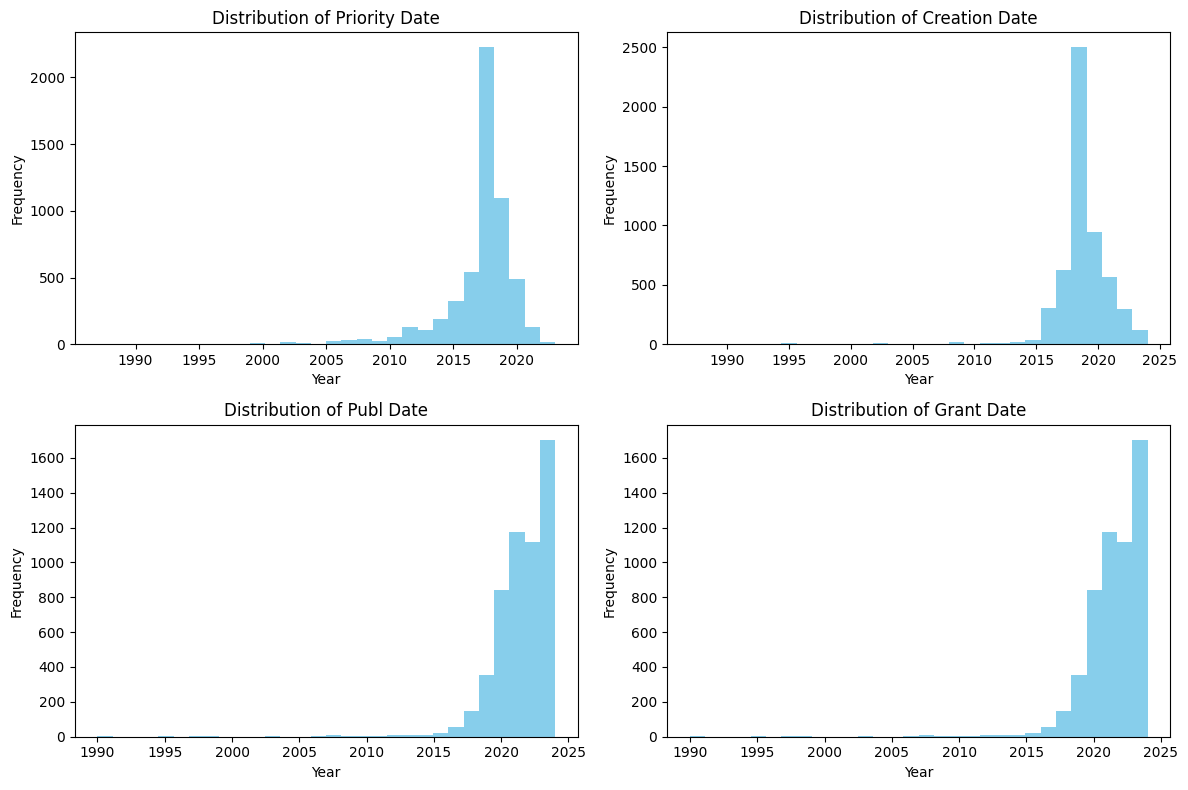

In [10]:
# Histogram for each date column
date_columns = ['priority_date', 'creation_date', 'publ_date', 'grant_date']

plt.figure(figsize=(12, 8))
for i, col in enumerate(date_columns, start=1):
    plt.subplot(2, 2, i)
    df[col].dropna().apply(lambda x: x.year).plot(kind='hist', bins=30, color='skyblue')
    plt.title(f'Distribution of {col.replace("_", " ").title()}')
    plt.xlabel('Year')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


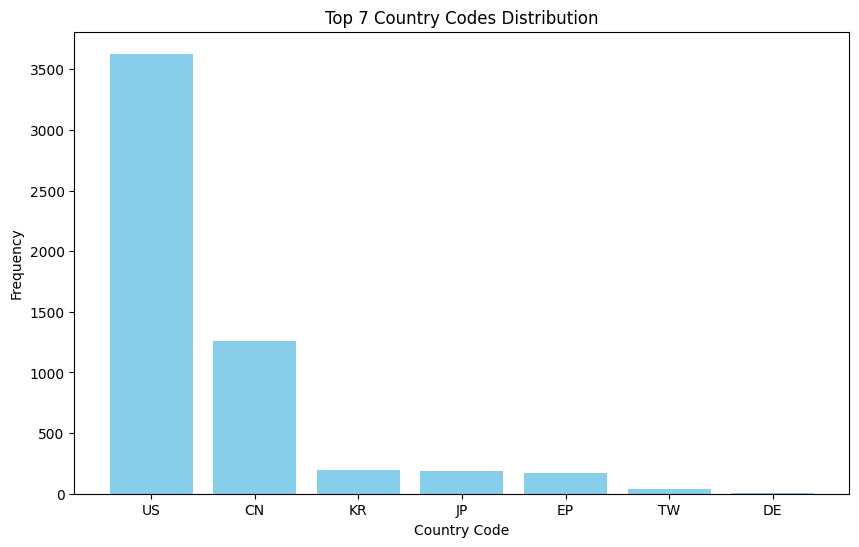

In [11]:
# Get the top 7 most common country codes
top_countries = df['country_code'].value_counts().head(7)

# Plotting the frequency count distribution of the top 7 countries
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries.values, color='skyblue')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.title('Top 7 Country Codes Distribution')
plt.show()

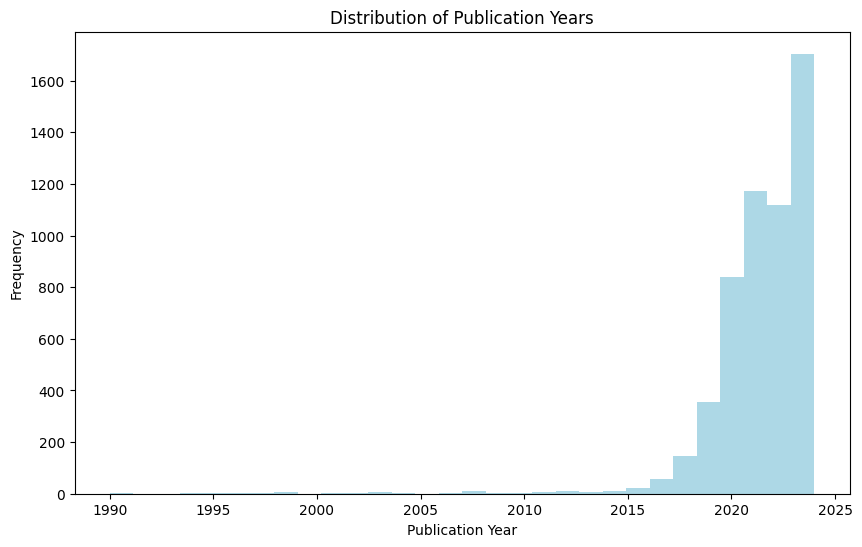

In [12]:
plt.figure(figsize=(10, 6))
df['publ_date'].dropna().apply(lambda x: x.year).plot(kind='hist', bins=30, color='lightblue')
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Frequency')
plt.show()


In [13]:
%pip install pandas sqlalchemy psycopg2


Note: you may need to restart the kernel to use updated packages.


In [14]:
from sqlalchemy import create_engine

username = 'postgres'
password = 'sukhreen'
host = 'localhost'
port = '5432'
database = 'patent_data'

# Create an SQLAlchemy engine
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')


In [15]:
# Upload the DataFrame to PostgreSQL
df.to_sql('Patent', con=engine, if_exists='replace', index=False)


494

In [16]:
# Assuming 'df' is your cleaned DataFrame
output_path = "../dataset/cleaned_dataset.csv"
df.to_csv(output_path, index=False) 

print(f"Data saved to {output_path}")

Data saved to ../dataset/cleaned_dataset.csv
